In [1]:
# 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업 폴더 이동

HOME = '/content/drive/MyDrive/20240603'

import os
%cd {HOME}

/content/drive/MyDrive/20240603


In [3]:
# 데이터셋 불러오기

import pandas as pd

pg = pd.read_csv('penguins_size.csv')
pg

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
# 샘플 데이터 추출하기

pg.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
77,Adelie,Torgersen,37.2,19.4,184.0,3900.0,MALE
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE


In [5]:
# 데이터 기초 정보 확인

pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
# 데이터 통계량 살펴보기

pg.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,342.0,NaN,NaN,NaN,43.92193,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,NaN,NaN,NaN,17.15117,1.974793,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,342.0,NaN,NaN,NaN,200.915205,14.061714,172.0,190.0,197.0,213.0,231.0
body_mass_g,342.0,NaN,NaN,NaN,4201.754386,801.954536,2700.0,3550.0,4050.0,4750.0,6300.0
sex,334,3,MALE,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 성별(sex) 속성의 유형별 고유한 값을 unique( )를 사용해 확인하기

pg['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

In [10]:
# 마침표 있는 행 확인

pg[pg['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
# 잘못된 데이터 삭제하기

pg.drop(336, inplace=True)
pg['sex'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [12]:
# 전체 데이터프레임 확인

pg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [13]:
# 데이터프레임의 속성별 결측치의 개수를 구하기

pg.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
# 결측치 처리하기

pg['culmen_length_mm'].fillna(value=pg['culmen_length_mm'].mean(), inplace=True)
pg['culmen_depth_mm'].fillna(value=pg['culmen_depth_mm'].mean(), inplace=True)
pg['flipper_length_mm'].fillna(value=pg['flipper_length_mm'].mean(), inplace=True)
pg['body_mass_g'].fillna(value=pg['body_mass_g'].mean(), inplace=True)

pg.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [51]:
# 결측치 삭제하기

pg = pg.dropna()
pg.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

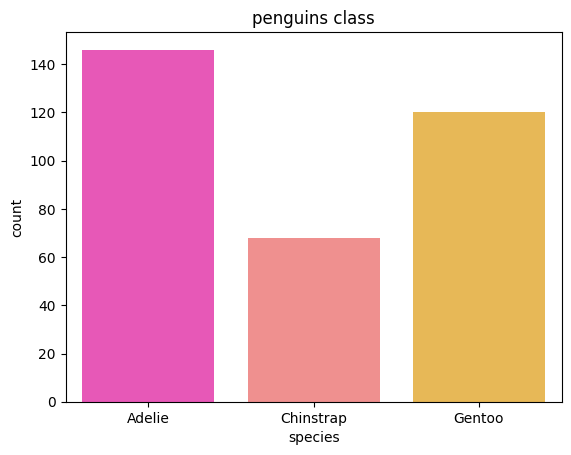

In [52]:
# 데이터 시각화하기

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='species', hue='species', data=pg, palette='spring')
plt.title('penguins class')
plt.show()

In [53]:
# 클래스 개수 파악하기
# species 속성의 고윳값을 출력하기

pg['species'].value_counts()

species
Adelie       146
Gentoo       120
Chinstrap     68
Name: count, dtype: int64

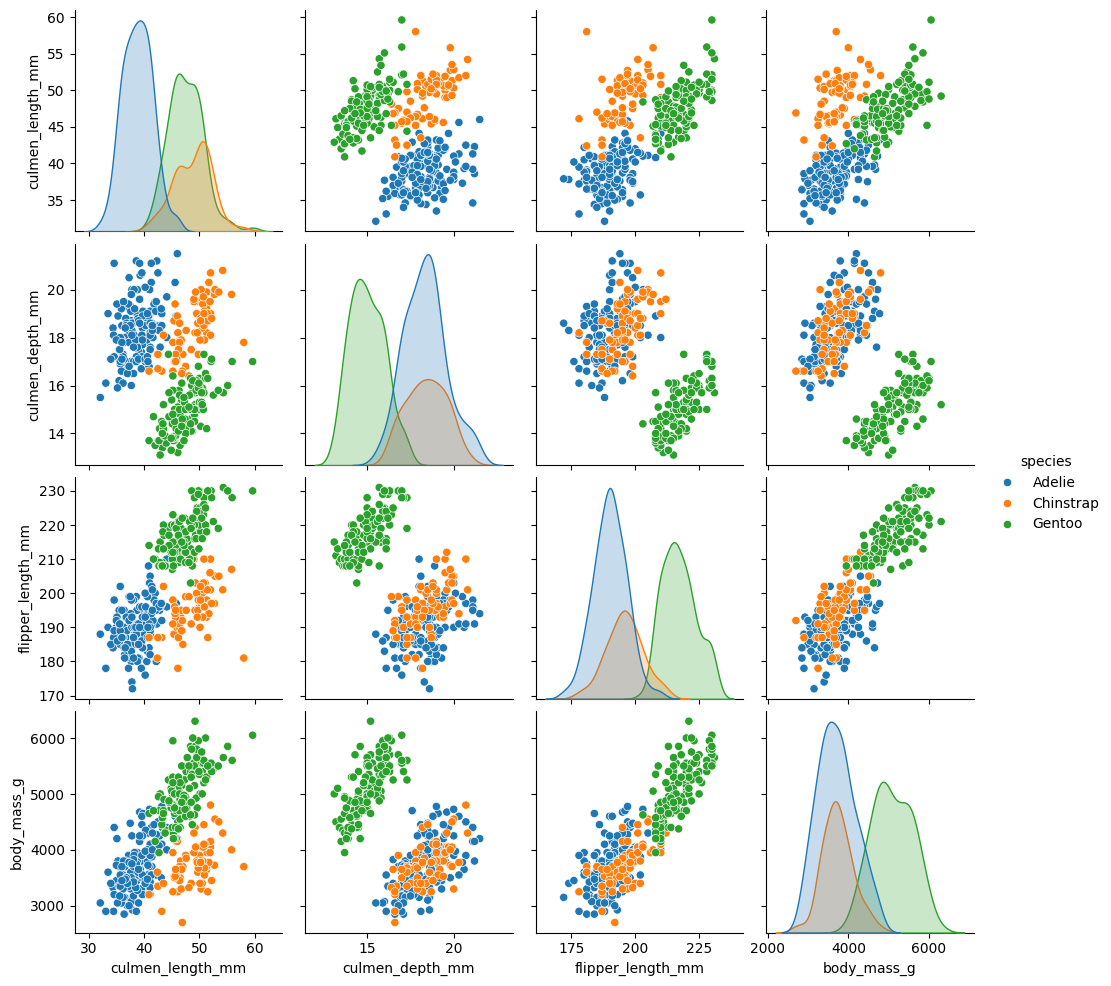

In [54]:
# 속성별 상관관계 분석하기

sns.pairplot(pg, hue = 'species')


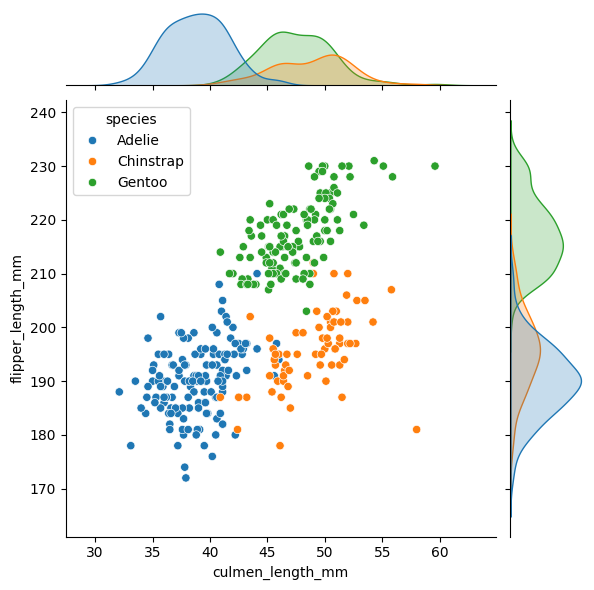

In [55]:
# 두 개의 실수형 데이터 속성을 비교하여 산점도로 출력하기

sns.jointplot(x='culmen_length_mm', y='flipper_length_mm', data = pg, kind = 'scatter', hue='species')

In [56]:
# 모델 학습을 위한 전처리하기
# 목형 변수를 원핫인코딩

pg_encoding = pd.get_dummies(pg, columns = ['island', 'sex'])
pg_encoding.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,False,False,True,False,False,True
1,Adelie,39.5,17.4,186.0,3800.0,False,False,True,False,True,False
2,Adelie,40.3,18.0,195.0,3250.0,False,False,True,False,True,False
4,Adelie,36.7,19.3,193.0,3450.0,False,False,True,False,True,False
5,Adelie,39.3,20.6,190.0,3650.0,False,False,True,False,False,True


In [57]:
# 독립변수와 종속변수 구분하기

X = pg_encoding.drop(['species'], axis = 1)
y = pg_encoding['species']

In [58]:
# 훈련 데이터와 테스트 데이터로 분리하기
# 훈련용 독립변수, 테스트용 독립변수, 훈련용 종속변수, 테스트용 종속변수로 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 10), (101, 10), (233,), (101,))

In [59]:
# kNN 모델 생성하기

from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
# 훈련용 데이터로 학습한 결과 확인하기

knn.score(X_train, y_train)

0.9141630901287554

In [61]:
# 예측하기
# y_pred: 테스트용 독립 변수에 대해 예측한 값

y_pred = knn.predict(X_test)
y_pred[:20]

array(['Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie'], dtype=object)

In [62]:
# 평가하기

knn.score(X_test, y_test)

0.8118811881188119

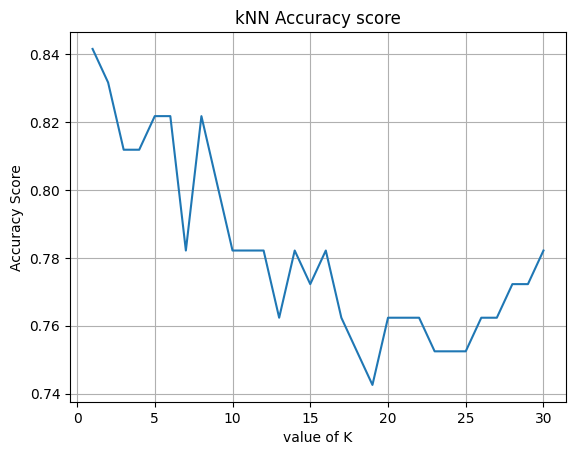

In [63]:
# k값을 1부터 1씩 증가시켜 k값에 따라 성능이 어떻게 변화하는지 시각화하기


import numpy as np
import matplotlib.pyplot as plt

k_range = range(1, 31)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.plot(k_range, scores)
plt.xlabel('value of K')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 31, 5))
plt.grid()
plt.title('kNN Accuracy score')
plt.show()

In [64]:
# k값 정하기

for value, score in enumerate(scores):
  print('k={}일 때: accuracy:{:.3f}'.format(value+1, score))
pg = pd.read_csv('penguins_size.csv')
pg

k=1일 때: accuracy:0.842
k=2일 때: accuracy:0.832
k=3일 때: accuracy:0.812
k=4일 때: accuracy:0.812
k=5일 때: accuracy:0.822
k=6일 때: accuracy:0.822
k=7일 때: accuracy:0.782
k=8일 때: accuracy:0.822
k=9일 때: accuracy:0.802
k=10일 때: accuracy:0.782
k=11일 때: accuracy:0.782
k=12일 때: accuracy:0.782
k=13일 때: accuracy:0.762
k=14일 때: accuracy:0.782
k=15일 때: accuracy:0.772
k=16일 때: accuracy:0.782
k=17일 때: accuracy:0.762
k=18일 때: accuracy:0.752
k=19일 때: accuracy:0.743
k=20일 때: accuracy:0.762
k=21일 때: accuracy:0.762
k=22일 때: accuracy:0.762
k=23일 때: accuracy:0.752
k=24일 때: accuracy:0.752
k=25일 때: accuracy:0.752
k=26일 때: accuracy:0.762
k=27일 때: accuracy:0.762
k=28일 때: accuracy:0.772
k=29일 때: accuracy:0.772
k=30일 때: accuracy:0.782


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [46]:
# 독립변수 정규화하기

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)

scaled = scaler.transform(X)

round(pd.DataFrame(scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8
count,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00,343.00
mean,0.43,0.48,0.49,0.42,0.49,0.36,0.15,0.48,0.49
std,0.20,0.23,0.24,0.22,0.50,0.48,0.36,0.50,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.26,0.30,0.31,0.24,0.00,0.00,0.00,0.00,0.00
50%,0.44,0.50,0.42,0.38,0.00,0.00,0.00,0.00,0.00
75%,0.60,0.67,0.69,0.57,1.00,1.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [47]:
# 훈련 데이터와 테스트 데이터로 분리하기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size = 0.3, random_state = 11)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 9), (103, 9), (240,), (103,))

In [48]:
# 모델 생성 및 학습하기

from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# 테스트하기



In [49]:
# 평가하기

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9958333333333333
1.0


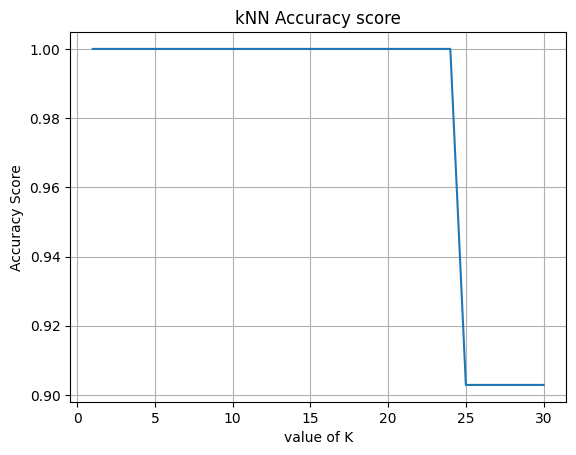

In [50]:
# k값에 따른 성능 비교하기

import numpy as np
import matplotlib.pyplot as plt

k_range = range(1, 31)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.plot(k_range, scores)
plt.xlabel('value of K')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 31, 5))
plt.grid()
plt.title('kNN Accuracy score')
plt.show()